In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [3]:
train_data = pd.read_csv('train.csv')

In [5]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [6]:
train_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [7]:
train_data.info

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

In [8]:
import seaborn as sb

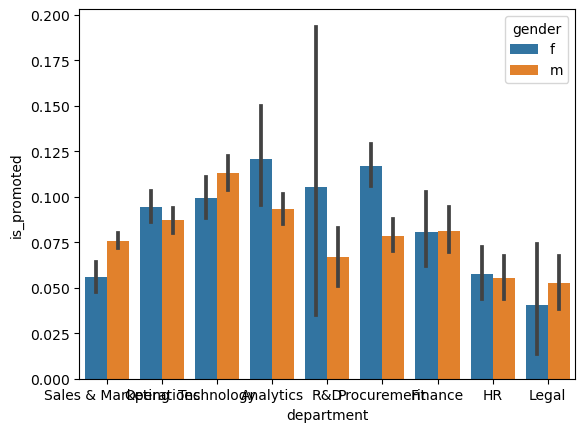

In [9]:
tx = sb.barplot(data=train_data, x="department", y="is_promoted", hue="gender")

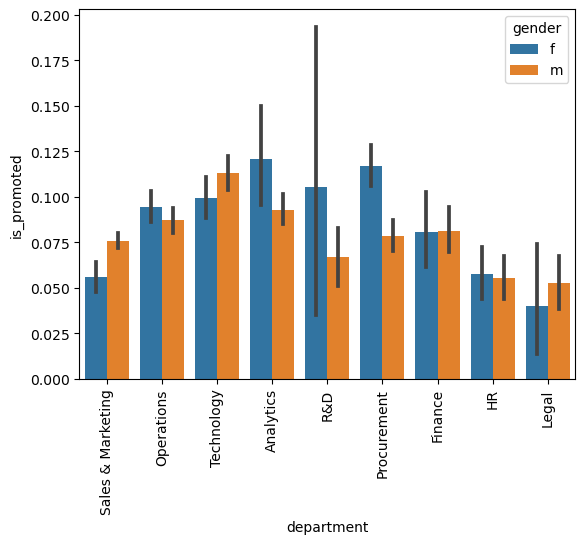

In [10]:
tx.set_xticklabels(tx.get_xticklabels(), rotation=90)
tx.figure

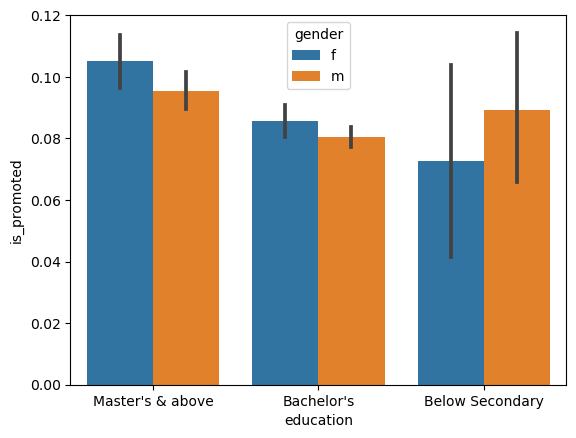

In [11]:
tx2 = sb.barplot(data=train_data, x="education", y="is_promoted", hue="gender")

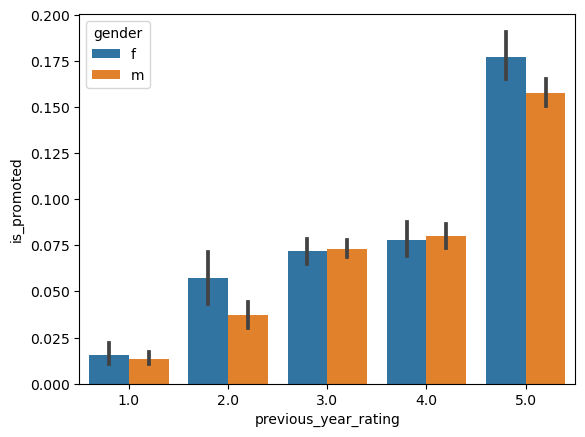

In [13]:
tx3 = sb.barplot(data=train_data, x="previous_year_rating", y="is_promoted", hue="gender")

In [14]:
train_data.corr()

/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_20311/1402113604.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.039927,-0.038122,-0.010670
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.195871,0.181147,1.000000


/var/folders/gl/wdltsr_94r503kcx0k1zhv5r0000gp/T/ipykernel_20311/3767474310.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



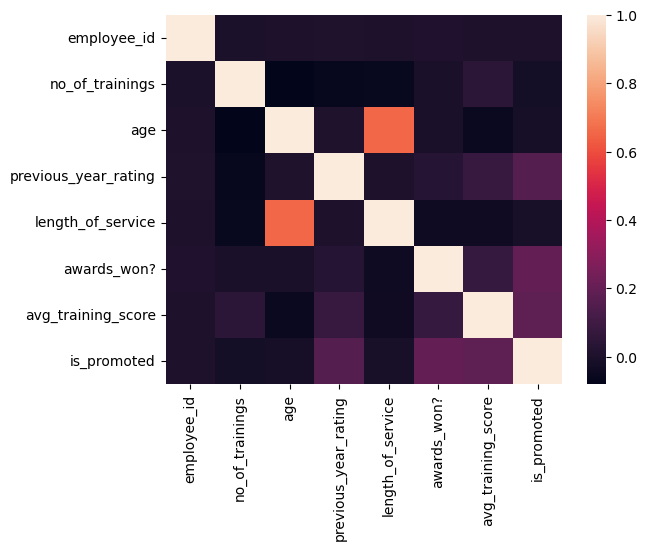

In [15]:
sb.heatmap(train_data.corr());

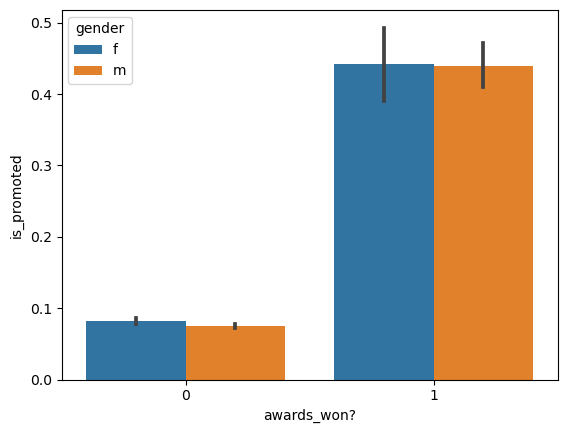

In [16]:
tx4 = sb.barplot(data=train_data, x="awards_won?", y="is_promoted", hue="gender")

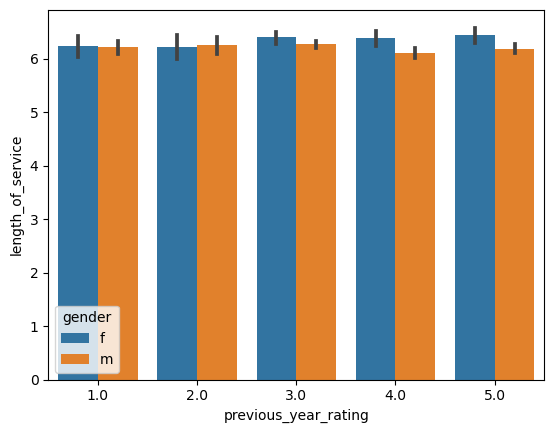

In [17]:
tx5 = sb.barplot(data=train_data, x="previous_year_rating", y="length_of_service", hue="gender")

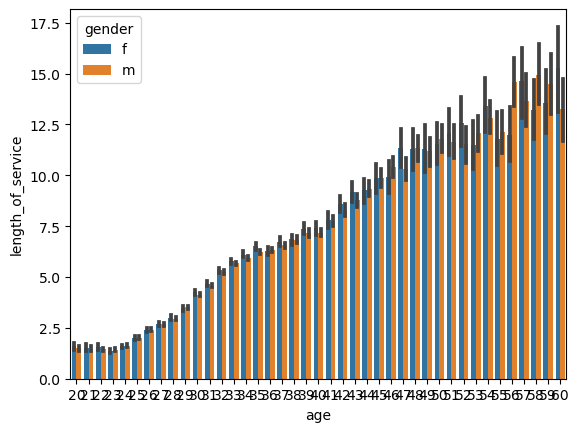

In [22]:
tx6 = sb.barplot(data=train_data, x="age", y="length_of_service", hue="gender")

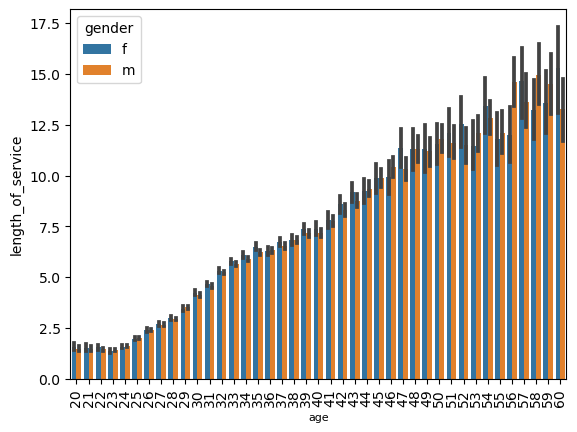

In [26]:
tx6.set_xticklabels(tx6.get_xticklabels(), rotation=90)
tx6.figure